In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [21]:
IMAGE_SIZE = 256
CHANNELS = 3

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'seed_dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 406 images belonging to 3 classes.


In [23]:
train_generator.class_indices


{'oocarpa': 0, 'psegoutrobus': 1, 'tecunumanii': 2}

In [24]:
class_names = list(train_generator.class_indices.keys())
class_names

['oocarpa', 'psegoutrobus', 'tecunumanii']

In [25]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.47913256 0.4869757  0.48305413]
  [0.47852805 0.4863712  0.48244962]
  [0.4799551  0.48779824 0.48387668]
  ...
  [0.4844523  0.49229544 0.48837388]
  [0.48627454 0.49411768 0.4901961 ]
  [0.4766133  0.48445645 0.48053488]]

 [[0.48300725 0.4908504  0.48562026]
  [0.4824027  0.49024585 0.48622477]
  [0.4817982  0.48964134 0.48571977]
  ...
  [0.4862659  0.49410903 0.49018747]
  [0.48627454 0.49411768 0.4901961 ]
  [0.47479972 0.48264286 0.4787213 ]]

 [[0.48627454 0.49411768 0.48235297]
  [0.48627454 0.49411768 0.48235297]
  [0.4856729  0.49351603 0.48295462]
  ...
  [0.48627454 0.49411768 0.4901961 ]
  [0.48461023 0.49245337 0.4885318 ]
  [0.46892294 0.4777819  0.4748761 ]]

 ...

 [[0.37204114 0.3754548  0.38228214]
  [0.40958378 0.41013855 0.4112481 ]
  [0.40904644 0.40904644 0.4156863 ]
  ...
  [0.62413114 0.6307709  0.627451  ]
  [0.6235323  0.6313697  0.627451  ]
  [0.62413687 0.63076514 0.627451  ]]

 [[0.373612   0.3774369  0.38508677]
  [0.4155868  0.4155868  0.4156863 ]


In [26]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'seed_dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 97 images belonging to 3 classes.


In [27]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'seed_dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 36 images belonging to 3 classes.


In [28]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.39816618 0.40600932 0.40208775]
  [0.3914632  0.39930633 0.39538476]
  [0.38476017 0.3926033  0.38868174]
  ...
  [0.37979227 0.38198584 0.38637298]
  [0.3693987  0.37116668 0.37470263]
  [0.36590257 0.3701298  0.36801618]]

 [[0.42176145 0.4296046  0.42568302]
  [0.42232004 0.43016317 0.4262416 ]
  [0.42287862 0.43072176 0.4268002 ]
  ...
  [0.37364784 0.3764     0.38190433]
  [0.37163302 0.37284243 0.37526122]
  [0.36310968 0.36845407 0.36578184]]

 [[0.42824784 0.43263498 0.4304414 ]
  [0.4254549  0.43095925 0.42820707]
  [0.422662   0.42928347 0.42597273]
  ...
  [0.3675034  0.37081414 0.37743562]
  [0.37386736 0.3745182  0.3758198 ]
  [0.36031675 0.36677828 0.36354753]]

 ...

 [[0.29389447 0.30311918 0.29273608]
  [0.27646226 0.29214853 0.28822696]
  [0.2929936  0.3068474  0.3047583 ]
  ...
  [0.5091931  0.51250386 0.51912534]
  [0.5086345  0.5113867  0.516891  ]
  [0.50807595 0.5102696  0.51465666]]

 [[0.29054296 0.30088484 0.2916189 ]
  [0.278138   0.2938243  0.28990272]


In [29]:
# Model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
406/32

12.6875

In [32]:
97/32

3.03125

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=12,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=3,
    verbose=1,
    epochs=20,
)

Epoch 1/20
12/12 [==============================] - 41s 3s/step - loss: 1.0922 - accuracy: 0.4733 - val_loss: 1.1038 - val_accuracy: 0.3438
Epoch 2/20
12/12 [==============================] - 38s 3s/step - loss: 1.0722 - accuracy: 0.5241 - val_loss: 1.0515 - val_accuracy: 0.3854
Epoch 3/20
12/12 [==============================] - 37s 3s/step - loss: 0.9066 - accuracy: 0.5989 - val_loss: 1.2367 - val_accuracy: 0.3229
Epoch 4/20
12/12 [==============================] - 39s 3s/step - loss: 0.7742 - accuracy: 0.6390 - val_loss: 1.0083 - val_accuracy: 0.4583
Epoch 5/20
12/12 [==============================] - 37s 3s/step - loss: 0.7516 - accuracy: 0.6444 - val_loss: 1.1032 - val_accuracy: 0.4167
Epoch 6/20
12/12 [==============================] - 39s 3s/step - loss: 0.7223 - accuracy: 0.6417 - val_loss: 0.9688 - val_accuracy: 0.4375
Epoch 7/20
12/12 [==============================] - 41s 3s/step - loss: 0.6947 - accuracy: 0.6604 - val_loss: 1.0046 - val_accuracy: 0.4271
Epoch 8/20
12/12 [==

In [35]:
scores = model.evaluate(test_generator)


2/2 [==============================] - 3s 337ms/step - loss: 0.4560 - accuracy: 0.8889


In [36]:
scores

[0.455959677696228, 0.8888888955116272]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 12}

In [39]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
type(history.history['loss'])


list

In [41]:
len(history.history['loss'])

20

In [42]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.0921809673309326,
 1.0722402334213257,
 0.9066466689109802,
 0.7741559147834778,
 0.7515798211097717]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
val_acc


[0.34375,
 0.3854166567325592,
 0.3229166567325592,
 0.4583333432674408,
 0.4166666567325592,
 0.4375,
 0.4270833432674408,
 0.46875,
 0.4375,
 0.46875,
 0.4791666567325592,
 0.4895833432674408,
 0.53125,
 0.5416666865348816,
 0.65625,
 0.625,
 0.65625,
 0.5833333134651184,
 0.875,
 0.8229166865348816]

In [45]:
acc

[0.4732620418071747,
 0.5240641832351685,
 0.5989304780960083,
 0.6390374302864075,
 0.644385039806366,
 0.6417112350463867,
 0.6604278087615967,
 0.6684492230415344,
 0.6550801992416382,
 0.6657754182815552,
 0.6925133466720581,
 0.6871657967567444,
 0.6898396015167236,
 0.7058823704719543,
 0.7807486653327942,
 0.7459893226623535,
 0.7914438247680664,
 0.8529411554336548,
 0.8582887649536133,
 0.90625]

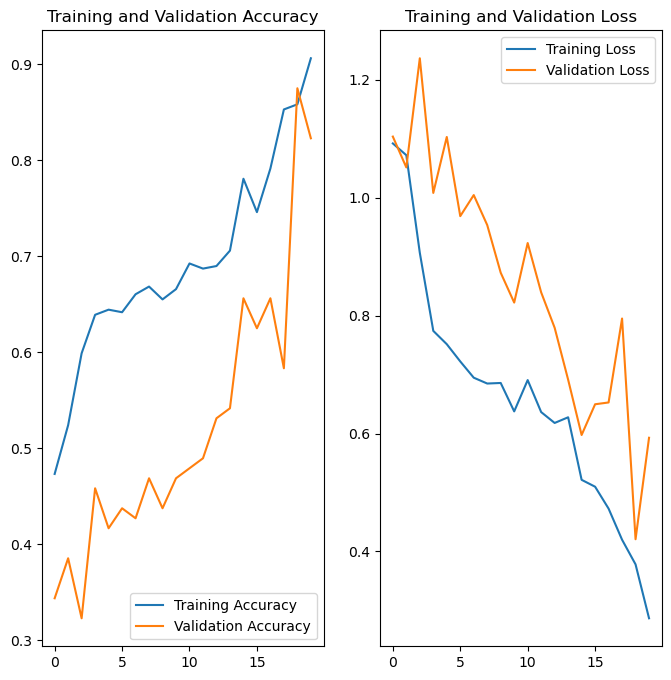

In [46]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: oocarpa
1/1 [==============================] - 0s 188ms/step
predicted label: psegoutrobus


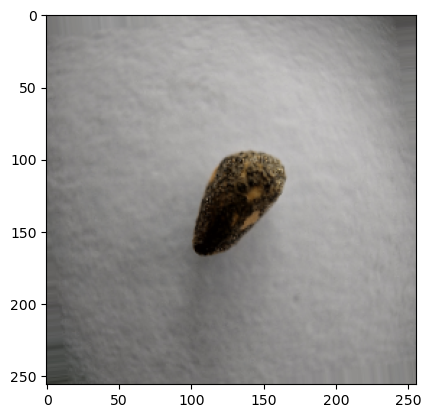

In [50]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break


In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


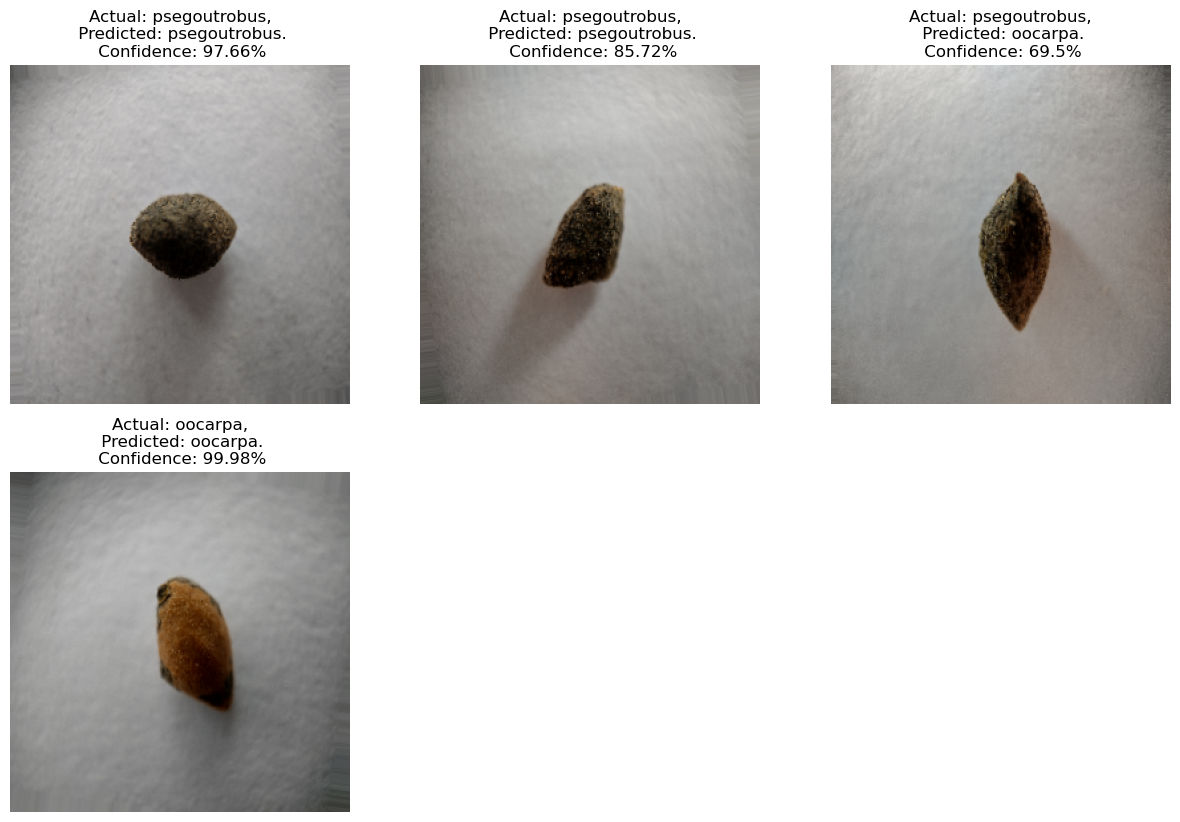

In [55]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break